# S&P500 CFD Pepperstone Data Edge

## raw data
### import data

In [ ]:
import pandas as pd 
import pandas_ta as ta
from edge_tools.ohlcv import normalize_ohlcv




/Users/ducjeremyvu/alpha/.venv/lib/python3.13/site-packages/pandas_ta/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


# NEW METHOD, USE DUCKDB

In [ ]:
from edge_tools.utils.nb import change_to_root_dir
from edge_tools.db import get_duckdb_connection
from edge_tools.load import ny_open_30_minute_by_date

change_to_root_dir()

con = get_duckdb_connection()

ny_open_30_minute_by_date()

Now in: /Users/ducjeremyvu/alpha


In [2]:
from pathlib import Path
from jinja2 import Template
from datetime import datetime
import pandas as pd
from edge_tools.ohlcv import ohlcv_for_date_and_prev

selected_date = datetime(2025, 11, 5)



# selected_date = "2025-11-05"

data = ohlcv_for_date_and_prev(symbol="US500", selected_date=selected_date)


data

,symbol,time,open,high,low,close,volume
0,US500,2025-11-04 00:00:00,6851.3,6851.3,6849.7,6849.8,60
1,US500,2025-11-04 00:01:00,6849.9,6849.9,6848.7,6848.9,29
2,US500,2025-11-04 00:02:00,6848.7,6849.0,6848.4,6848.5,44
3,US500,2025-11-04 00:03:00,6848.7,6849.3,6848.4,6848.4,45
4,US500,2025-11-04 00:04:00,6848.3,6848.9,6848.2,6848.2,43
...,...,...,...,...,...,...,...
2753,US500,2025-11-05 23:55:00,6809.1,6809.6,6808.6,6809.1,75
2754,US500,2025-11-05 23:56:00,6808.9,6809.3,6808.7,6809.2,53
2755,US500,2025-11-05 23:57:00,6809.1,6811.1,6809.1,6811.1,54
2756,US500,2025-11-05 23:58:00,6810.9,6811.5,6810.8,6811.3,37


In [3]:
from edge_tools.ohlcv import normalize_ohlcv
# Convert 'Date' column to datetime and set as index, also normalizes header names
data = normalize_ohlcv(data, style="lowercase")

data

,symbol,time,open,high,low,close,volume
0,US500,2025-11-04 00:00:00,6851.3,6851.3,6849.7,6849.8,60
1,US500,2025-11-04 00:01:00,6849.9,6849.9,6848.7,6848.9,29
2,US500,2025-11-04 00:02:00,6848.7,6849.0,6848.4,6848.5,44
3,US500,2025-11-04 00:03:00,6848.7,6849.3,6848.4,6848.4,45
4,US500,2025-11-04 00:04:00,6848.3,6848.9,6848.2,6848.2,43
...,...,...,...,...,...,...,...
2753,US500,2025-11-05 23:55:00,6809.1,6809.6,6808.6,6809.1,75
2754,US500,2025-11-05 23:56:00,6808.9,6809.3,6808.7,6809.2,53
2755,US500,2025-11-05 23:57:00,6809.1,6811.1,6809.1,6811.1,54
2756,US500,2025-11-05 23:58:00,6810.9,6811.5,6810.8,6811.3,37


In [4]:
import pytz
from edge_tools.time import preprocess_for_premarket_analysis
import pandas as pd

# could use split_us_market_hours from edge_tools.us_open import split_us_market_hours
# but here we will do it manually for clarity
data = preprocess_for_premarket_analysis(data)



def filter_us_market_hours(data: pd.DataFrame) -> pd.DataFrame:
    """
    Filters the DataFrame to include only rows where the US market is open (09:30 to 16:00 NY time).
    
    Parameters:
    data (pd.DataFrame): DataFrame with a 'ny_time_only' column containing time objects.
    
    Returns:
    pd.DataFrame: Filtered DataFrame with only US market hours.
    """
    # Define US open/close bounds
    open_time = pd.to_datetime("09:30").time()
    close_time = pd.to_datetime("16:00").time()
    
    # Filter only market hours
    filtered_data = data[data['ny_time_only'].between(open_time, close_time)]
    
    return filtered_data

us_open_data = filter_us_market_hours(data)
us_open_data

,symbol,open,high,low,close,volume,ny_time,ny_hour,ny_minute,ny_time_only,...,tokyo_minute,tokyo_time_only,london_time,london_hour,london_minute,london_time_only,shanghai_time,shanghai_hour,shanghai_minute,shanghai_time_only
time,,,,,,,,,,,,,,,,,,,,,
2025-11-04 14:30:00+00:00,US500,6784.4,6787.4,6778.9,6786.7,194,2025-11-04 09:30:00-05:00,9,30,09:30:00,...,30,23:30:00,2025-11-04 14:30:00+00:00,14,30,14:30:00,2025-11-04 22:30:00+08:00,22,30,22:30:00
2025-11-04 14:31:00+00:00,US500,6786.9,6788.7,6784.4,6784.7,184,2025-11-04 09:31:00-05:00,9,31,09:31:00,...,31,23:31:00,2025-11-04 14:31:00+00:00,14,31,14:31:00,2025-11-04 22:31:00+08:00,22,31,22:31:00
2025-11-04 14:32:00+00:00,US500,6784.4,6784.4,6779.7,6781.2,186,2025-11-04 09:32:00-05:00,9,32,09:32:00,...,32,23:32:00,2025-11-04 14:32:00+00:00,14,32,14:32:00,2025-11-04 22:32:00+08:00,22,32,22:32:00
2025-11-04 14:33:00+00:00,US500,6781.4,6781.4,6774.4,6774.4,158,2025-11-04 09:33:00-05:00,9,33,09:33:00,...,33,23:33:00,2025-11-04 14:33:00+00:00,14,33,14:33:00,2025-11-04 22:33:00+08:00,22,33,22:33:00
2025-11-04 14:34:00+00:00,US500,6774.7,6776.0,6772.9,6774.0,162,2025-11-04 09:34:00-05:00,9,34,09:34:00,...,34,23:34:00,2025-11-04 14:34:00+00:00,14,34,14:34:00,2025-11-04 22:34:00+08:00,22,34,22:34:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-05 20:56:00+00:00,US500,6809.0,6810.3,6808.0,6809.0,106,2025-11-05 15:56:00-05:00,15,56,15:56:00,...,56,05:56:00,2025-11-05 20:56:00+00:00,20,56,20:56:00,2025-11-06 04:56:00+08:00,4,56,04:56:00
2025-11-05 20:57:00+00:00,US500,6808.8,6808.8,6801.3,6802.0,128,2025-11-05 15:57:00-05:00,15,57,15:57:00,...,57,05:57:00,2025-11-05 20:57:00+00:00,20,57,20:57:00,2025-11-06 04:57:00+08:00,4,57,04:57:00
2025-11-05 20:58:00+00:00,US500,6802.3,6802.5,6800.0,6801.0,144,2025-11-05 15:58:00-05:00,15,58,15:58:00,...,58,05:58:00,2025-11-05 20:58:00+00:00,20,58,20:58:00,2025-11-06 04:58:00+08:00,4,58,04:58:00


In [6]:
def print_data_dates_info(data):
    unique_dates = sorted(list(set(data.index.date.tolist())))

    print(
        "first date:",unique_dates[0],
        # very first date doesnt have a previous day close  
        "\n last date:",unique_dates[-1], 
        "\n total trading days:", len(unique_dates)
    )
    return unique_dates

unique_dates = print_data_dates_info(data)
unique_dates

first date: 2025-11-04 
 last date: 2025-11-05 
 total trading days: 2


[datetime.date(2025, 11, 4), datetime.date(2025, 11, 5)]

In [ ]:
from datetime import datetime
from datetime import time 


### this slicing the data is obselete, now using duckdb data extraction to get only needed dates

def slice_data_by_date(data, selected_date):
    """
    Slices the data for a specific trading date and the previous trading date.

    Parameters:
    data (pd.DataFrame): The input DataFrame with a DateTimeIndex.
    selected_date (datetime): The date to filter the data by.

    Returns:
    pd.DataFrame: Filtered DataFrame for the selected date and previous trading date.
    """
    # Ensure the index is a DateTimeIndex
    if not isinstance(data.index, pd.DatetimeIndex):
        raise ValueError("Data index must be a DateTimeIndex")

    # Get sorted unique trading dates from the index
    trading_dates = sorted(set(data.index.date))
    sel_date = selected_date.date()

    if sel_date not in trading_dates:
        print(f"Selected date {sel_date} not found in data index")
        return None

    sel_idx = trading_dates.index(sel_date)
    prev_date = trading_dates[sel_idx - 1] if sel_idx > 0 else None

    # Filter data for the selected date and previous trading date
    if prev_date:
        filtered_data = data[(data.index.date == sel_date) | (data.index.date == prev_date)]
    else:
        filtered_data = data[data.index.date == sel_date]

    return filtered_data

# selected_date = datetime(2025, 11, 2)

# sliced_data = slice_data_by_date(data, selected_date)




def select_price_params(selection_key: str) -> dict:
    """
    Selects the parameters for price computation based on the selection key.

    Parameters:
    selection_key (str): Key indicating the type of price computation ('us_close', 'tokyo_open', 'london_open', etc.)

    Returns:
    dict: Dictionary containing parameters for the selected price computation.
    """

    selection_params = {
        "us_close_previous_day": {
            "date_select": 0,
            "column_name" : "ny_time",
            "time" : time(16)
        },
        "tokyo_open": {
            "date_select": -1,
            "column_name" : "tokyo_time",
            "time" : time(9)
        },
        "london_open": {
            "date_select": -1,
            "column_name" : "london_time",
            "time" : time(9)
        },
        "t_minus_60": {
            "date_select": -1,
            "column_name" : "ny_time",
            "time" : time(8, 30)
        },
        "t_minus_30": {
            "date_select": -1,
            "column_name" : "ny_time",
            "time" : time(9, 0)
        },
        "t_minus_15": {
            "date_select": -1,
            "column_name" : "ny_time",
            "time" : time(9, 15)
        },
        "us_open_current_day": {
            "date_select": -1,
            "column_name" : "ny_time",
            "time" : time(9, 30)
        },
        "us_close_current_day": {
            "date_select": -1,
            "column_name" : "ny_time",
            "time" : time(16)
        },

    }

    if selection_key not in selection_params:
        raise ValueError(f"Invalid selection key: {selection_key}")

    return selection_params[selection_key]





def compute_price(sliced_data, selection_key):
    """
    Computes price based on selection parameters.
    
    Parameters:
    sliced_data (pd.DataFrame): DataFrame containing market data
    selection_key (str): Key to select price computation parameters ('us_close', 'tokyo_open', 'london_open')
    
    Returns:
    float: Computed price value
    """
    # Get parameters for the selected price type
    params = select_price_params(selection_key)
    
    # Get unique trading dates in the sliced data
    trading_dates = sorted(set(sliced_data.index.date))
    
    if len(trading_dates) < 2:
        print("Not enough data to compute previous day's close.")
        return None
    if len(trading_dates) > 2:
        print("Sliced data contains more than two trading dates. Please provide data for only the selected date and previous date.")
        return None

    # Use params directly without unpacking
    target_date = params["date_select"]
    column_name = params["column_name"]
    target_time = params["time"]


    prev_date = trading_dates[target_date]

    # Filter data for the previous trading date
    prev_day_data = sliced_data[sliced_data[column_name].dt.date == prev_date]

    if prev_day_data.empty:
        print("No data found for the previous trading date.")
        return None

    # Get the last closing price of the previous trading day
    prev_day_close = prev_day_data.loc[prev_day_data[f"{column_name}_only"] == target_time].iloc[0]["close"]

    return prev_day_close




def compute_previous_day_close(sliced_data):
    return compute_price(sliced_data, selection_key="us_close_previous_day")

def compute_tokyo_open_price(sliced_data):
    return compute_price(sliced_data, selection_key="tokyo_open")

def compute_london_open_price(sliced_data):
    return compute_price(sliced_data, selection_key="london_open")

def compute_t_minus_60_price(sliced_data):
    return compute_price(sliced_data, selection_key="t_minus_60")

def compute_t_minus_30_price(sliced_data):  
    return compute_price(sliced_data, selection_key="t_minus_30")

def compute_t_minus_15_price(sliced_data):  
    return compute_price(sliced_data, selection_key="t_minus_15")

def compute_us_open_price(sliced_data):  
    return compute_price(sliced_data, selection_key="us_open_current_day")

def compute_us_close_price(sliced_data):  
    return compute_price(sliced_data, selection_key="us_close_current_day")

def compute_premarket_prices(sliced_data):
    us_close_previous_day_price = compute_previous_day_close(sliced_data)
    tokyo_open_price = compute_tokyo_open_price(sliced_data)
    london_open_price = compute_london_open_price(sliced_data)
    t_minus_60_price = compute_t_minus_60_price(sliced_data)
    t_minus_30_price = compute_t_minus_30_price(sliced_data)
    t_minus_15_price = compute_t_minus_15_price(sliced_data)
    us_open_current_day_price = compute_us_open_price(sliced_data)
    us_close_current_day_price = compute_us_close_price(sliced_data)


    return {
        "us_close_previous_day": us_close_previous_day_price,
        "tokyo_open": tokyo_open_price,
        "london_open": london_open_price,
        "t_minus_60": t_minus_60_price,
        "t_minus_30": t_minus_30_price,
        "t_minus_15": t_minus_15_price,
        "us_open_current_day": us_open_current_day_price,
        "us_close_current_day": us_close_current_day_price,

    }


def compute_changes(premarket_prices):
    def pct(a, b):
        if b is None or b == 0 or a is None:
            return None
        return round(((a - b) / b) * 100, 2)

    prev_close = premarket_prices.get("us_close_previous_day")
    tokyo_open = premarket_prices.get("tokyo_open")
    london_open = premarket_prices.get("london_open")
    t_minus_60_price = premarket_prices.get("t_minus_60")
    t_minus_30_price = premarket_prices.get("t_minus_30")
    t_minus_15_price = premarket_prices.get("t_minus_15")
    us_open_price = premarket_prices.get("us_open_current_day")
    us_close_price = premarket_prices.get("us_close_current_day")

    return {
        "tokyo_change_percent": pct(tokyo_open, prev_close),
        "london_change_percent": pct(london_open, prev_close),
        "t_minus_60_change_percent": pct(t_minus_60_price, prev_close),
        "t_minus_30_change_percent": pct(t_minus_30_price, prev_close),
        "t_minus_15_change_percent": pct(t_minus_15_price, prev_close),
        "prev_close_to_us_open_change_percent": pct(us_open_price, prev_close),
        "prev_close_to_us_close_change_percent": pct(us_close_price, prev_close),
        "us_open_to_us_close_change_percent_current_day": pct(us_close_price, us_open_price),
    }

def compute_metrics(symbol="US500", selected_date=selected_date):
    # Slice data for the selected date and previous date
    data = ohlcv_for_date_and_prev(symbol="US500", selected_date=selected_date)
    data = normalize_ohlcv(data, style="lowercase")
    
    data = preprocess_for_premarket_analysis(data)
    premarket_prices = compute_premarket_prices(data)
    changes = compute_changes(premarket_prices)
    return {**premarket_prices, **changes}

compute_metrics(data, "2025-11-05")


{'us_close_previous_day': 6779.9,
 'tokyo_open': 6768.0,
 'london_open': 6771.8,
 't_minus_60': 6775.5,
 't_minus_30': 6779.0,
 't_minus_15': 6777.6,
 'us_open_current_day': 6776.3,
 'us_close_current_day': 6797.7,
 'tokyo_change_percent': -0.18,
 'london_change_percent': -0.12,
 't_minus_60_change_percent': -0.06,
 't_minus_30_change_percent': -0.01,
 't_minus_15_change_percent': -0.03,
 'prev_close_to_us_open_change_percent': -0.05,
 'prev_close_to_us_close_change_percent': 0.26,
 'us_open_to_us_close_change_percent_current_day': 0.32}

# display (not right now)

Dropdown(description='Date:', index=3, options=(datetime.date(2025, 10, 29), datetime.date(2025, 10, 30), date…

Output()

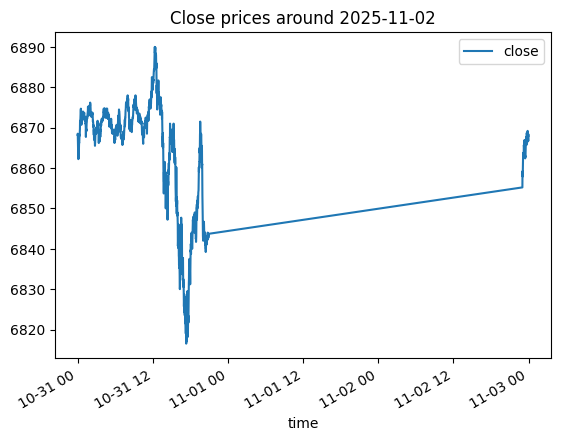

In [88]:
from IPython.display import display
import datetime

# reuse existing Output widget to show results
date_selection_out.clear_output()

def on_date_change(change):
    if change.get("name") != "value" or change.get("new") is None:
        return

    sel_date = change["new"]                       # datetime.date from the dropdown
    selected_dt = datetime.datetime(sel_date.year, sel_date.month, sel_date.day)

    # update notebook-scoped variables
    global selected_date, sliced_data
    selected_date = selected_dt
    sliced_data = slice_data_by_date(data, selected_date)

    date_selection_out.clear_output()
    with date_selection_out:
        if sliced_data is None:
            print("No data for selected date")
            return

        print("Selected date:", sel_date)
        # compute and print metrics (uses compute_metrics / compute_previous_day_close from earlier cells)
        compute_metrics(sliced_data)

        # # quick preview and optional plot
        # display(sliced_data.tail())
        try:
            sliced_data[['close']].plot(title=f"Close prices around {sel_date}")
        except Exception as e:
            print("Plot failed:", e)

# attach observer and trigger once for current value
date_selection.observe(on_date_change, names="value")
on_date_change({'name':'value', 'new': date_selection.value})

# display widget + output
display(date_selection, date_selection_out)



In [ ]:
date_selection.trait_defaults

datetime.date(2025, 10, 30)